we aim to classify stars, galaxies, and quasars based on their spectral characteristics.


importing libraries


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn  import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.decomposition import PCA
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading the Dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/star_classification.csv")
df.head()


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [ ]:
df.index


RangeIndex(start=0, stop=100000, step=1)

In [ ]:
df.shape

(100000, 18)

In [ ]:
df.size

1800000

In [ ]:
df.ndim

2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
df.dtypes


obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [ ]:
df.columns


Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

Checking for missing values

In [ ]:
df['MJD']

0        56354
1        58158
2        55592
3        58039
4        56187
         ...  
99995    57749
99996    56934
99997    54535
99998    56368
99999    57104
Name: MJD, Length: 100000, dtype: int64

In [ ]:
df['alpha']

0        135.689107
1        144.826101
2        142.188790
3        338.741038
4        345.282593
            ...    
99995     39.620709
99996     29.493819
99997    224.587407
99998    212.268621
99999    196.896053
Name: alpha, Length: 100000, dtype: float64

In [ ]:
df['cam_col']

0        2
1        5
2        2
3        3
4        3
        ..
99995    2
99996    1
99997    4
99998    4
99999    4
Name: cam_col, Length: 100000, dtype: int64

In [ ]:
df.nunique()

obj_ID          78053
alpha           99999
delta           99999
u               93748
g               92651
r               91901
i               92019
z               92007
run_ID            430
rerun_ID            1
cam_col             6
field_ID          856
spec_obj_ID    100000
class               3
redshift        99295
plate            6284
MJD              2180
fiber_ID         1000
dtype: int64

In [ ]:
df.count()

obj_ID         100000
alpha          100000
delta          100000
u              100000
g              100000
r              100000
i              100000
z              100000
run_ID         100000
rerun_ID       100000
cam_col        100000
field_ID       100000
spec_obj_ID    100000
class          100000
redshift       100000
plate          100000
MJD            100000
fiber_ID       100000
dtype: int64

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [ ]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


obj_ID         1.237665e+18
alpha          1.776291e+02
delta          2.413530e+01
u              2.198047e+01
g              2.053139e+01
r              1.964576e+01
i              1.908485e+01
z              1.866881e+01
run_ID         4.481366e+03
rerun_ID       3.010000e+02
cam_col        3.511610e+00
field_ID       1.861305e+02
spec_obj_ID    5.783882e+18
redshift       5.766608e-01
plate          5.137010e+03
MJD            5.558865e+04
fiber_ID       4.493127e+02
dtype: float64

In [ ]:
df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


obj_ID         8.438560e+12
alpha          9.650224e+01
delta          1.964467e+01
u              3.176929e+01
g              3.175029e+01
r              1.854760e+00
i              1.757895e+00
z              3.172815e+01
run_ID         1.964765e+03
rerun_ID       0.000000e+00
cam_col        1.586912e+00
field_ID       1.490111e+02
spec_obj_ID    3.324016e+18
redshift       7.307073e-01
plate          2.952303e+03
MJD            1.808484e+03
fiber_ID       2.724984e+02
dtype: float64

In [ ]:
df.min()

obj_ID         1237645942904389888.0
alpha                       0.005528
delta                     -18.785328
u                            -9999.0
g                            -9999.0
r                            9.82207
i                           9.469903
z                            -9999.0
run_ID                           109
rerun_ID                         301
cam_col                            1
field_ID                          11
spec_obj_ID     299519089380976640.0
class                         GALAXY
redshift                   -0.009971
plate                            266
MJD                            51608
fiber_ID                           1
dtype: object

In [ ]:

df.max()

obj_ID          1237680531356386304.0
alpha                       359.99981
delta                       83.000519
u                            32.78139
g                            31.60224
r                            29.57186
i                            32.14147
z                            29.38374
run_ID                           8162
rerun_ID                          301
cam_col                             6
field_ID                          989
spec_obj_ID    14126940609093851136.0
class                            STAR
redshift                     7.011245
plate                           12547
MJD                             58932
fiber_ID                         1000
dtype: object

In [ ]:
df.memory_usage(deep=True)

Index              128
obj_ID          800000
alpha           800000
delta           800000
u               800000
g               800000
r               800000
i               800000
z               800000
run_ID          800000
rerun_ID        800000
cam_col         800000
field_ID        800000
spec_obj_ID     800000
class          6199929
redshift        800000
plate           800000
MJD             800000
fiber_ID        800000
dtype: int64

In [ ]:
df.corr

<bound method DataFrame.corr of              obj_ID       alpha      delta         u         g         r  \
0      1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1      1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2      1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3      1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4      1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
...             ...         ...        ...       ...       ...       ...   
99995  1.237679e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.237679e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.237668e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.237661e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.237661e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  rerun_ID  cam_col  f

checking for null values


if null values are present it return true ,else false


In [ ]:
df.isna()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Return true if all values in a column is null


In [ ]:
df.isna().all() 

obj_ID         False
alpha          False
delta          False
u              False
g              False
r              False
i              False
z              False
run_ID         False
rerun_ID       False
cam_col        False
field_ID       False
spec_obj_ID    False
class          False
redshift       False
plate          False
MJD            False
fiber_ID       False
dtype: bool

In [ ]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

dropping columns which having high std and zero std


In [ ]:
df = df.drop(columns=['obj_ID'])
df = df.drop(columns=['alpha'])
# df = df.drop(columns=['rerun_ID'])

categorical analysis

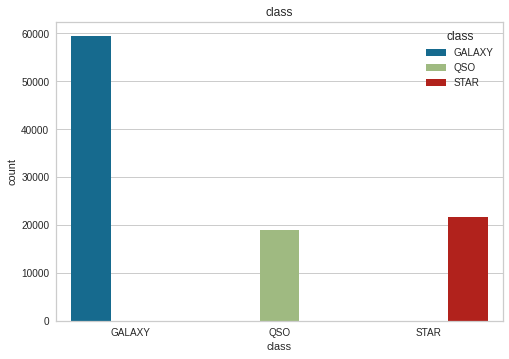

In [ ]:
cat=["class"]
df_cat = df.loc[:, cat]
for i in cat:
    plt.figure()
    sns.countplot(x = i, data = df_cat,hue = "class")
    plt.title(i)

In [ ]:
df["class"].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

converting the labels into machine readable language for better output 

In [ ]:
df["class"]=[0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in df["class"]]

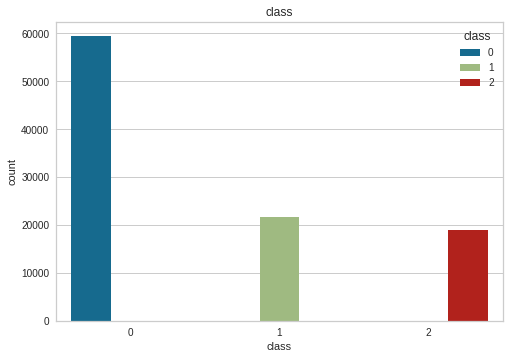

In [ ]:
cat=["class"]
df_cat = df.loc[:, cat]
for i in cat:
    plt.figure()
    sns.countplot(x = i, data = df_cat,hue = "class")
    plt.title(i)

visualization


In [ ]:
df.columns

Index(['delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID', 'cam_col',
       'field_ID', 'spec_obj_ID', 'class', 'redshift', 'plate', 'MJD',
       'fiber_ID'],
      dtype='object')

In [ ]:
#df.u.value_counts().plot.bar()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   delta        100000 non-null  float64
 1   u            100000 non-null  float64
 2   g            100000 non-null  float64
 3   r            100000 non-null  float64
 4   i            100000 non-null  float64
 5   z            100000 non-null  float64
 6   run_ID       100000 non-null  int64  
 7   rerun_ID     100000 non-null  int64  
 8   cam_col      100000 non-null  int64  
 9   field_ID     100000 non-null  int64  
 10  spec_obj_ID  100000 non-null  float64
 11  class        100000 non-null  int64  
 12  redshift     100000 non-null  float64
 13  plate        100000 non-null  int64  
 14  MJD          100000 non-null  int64  
 15  fiber_ID     100000 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 12.2 MB


In [ ]:
correlation_matrix = df.corr()

In [ ]:
correlation_matrix['class'].sort_values(ascending = False)

class          1.000000
redshift       0.536822
i              0.284396
plate          0.215722
spec_obj_ID    0.215722
MJD            0.207262
r              0.150691
delta          0.056643
fiber_ID       0.032053
z              0.017352
cam_col        0.014476
run_ID        -0.000049
g             -0.005915
u             -0.017701
field_ID      -0.038044
rerun_ID            NaN
Name: class, dtype: float64

In [ ]:
# Demonstrate generation of heatmap using matplotlib
corr = df.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)
# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

NameError: ignored

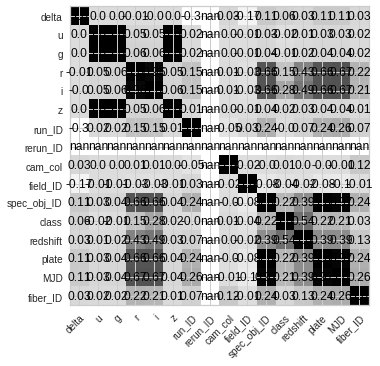

In [ ]:
# Demonstrate generation of heatmap using matplotlib # get correlation matrix
corr = df.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)
# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)): 
  for j in range(len(corr.columns)):
    text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2), ha="center", va="center", color="black")

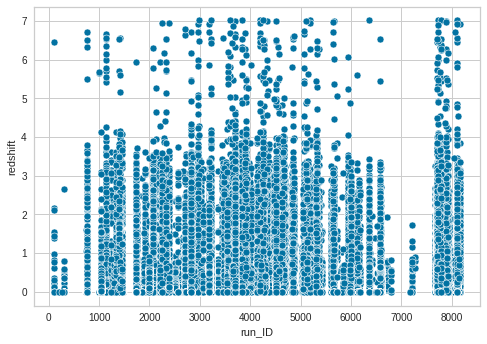

In [ ]:
import seaborn as sns
sns.scatterplot(x = df.run_ID,y=df.redshift)

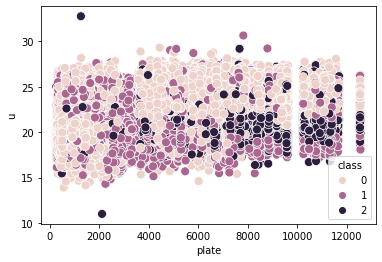

In [ ]:
# define the size =80
sns.scatterplot(x='plate',y ='u',hue = 'class',data = df,s=80)

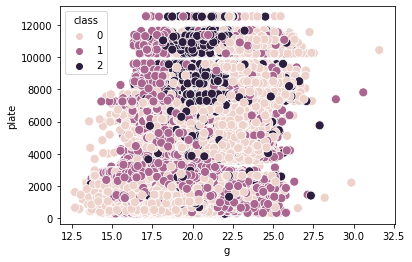

In [ ]:
sns.scatterplot(x='g',y ='plate',hue = 'class',data = df,s=80)

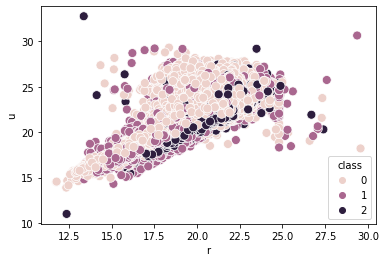

In [ ]:
sns.scatterplot(x='r',y ='u',hue = 'class',data = df,s=80)

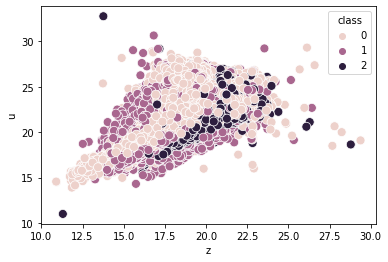

In [ ]:
sns.scatterplot(x='z',y ='u',hue = 'class',data = df,s=80)

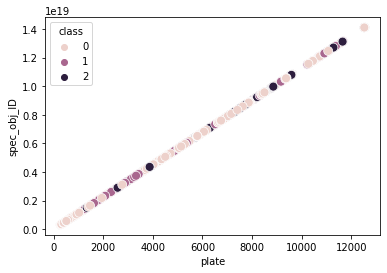

In [ ]:
sns.scatterplot(x='plate',y ='spec_obj_ID',hue = 'class',data = df,s=80)

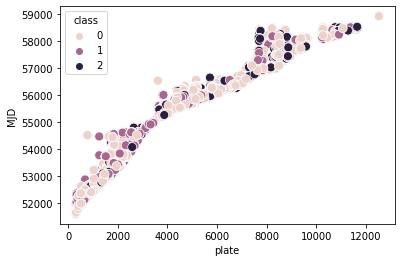

In [ ]:
sns.scatterplot(x='plate',y ='MJD',hue = 'class',data = df,s=80)

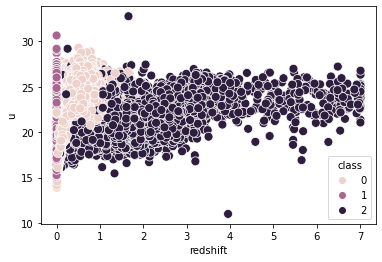

In [ ]:
sns.scatterplot(x='redshift',y ='u',hue = 'class',data = df,s=80)

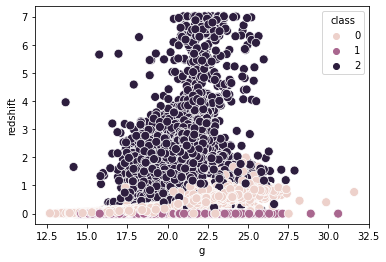

In [ ]:
sns.scatterplot(x='g',y ='redshift',hue = 'class',data = df,s=80)

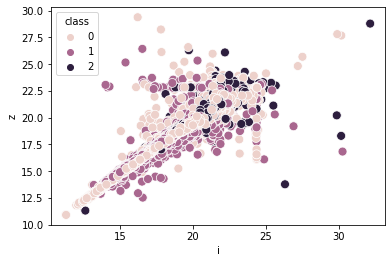

In [ ]:
sns.scatterplot(x='i',y ='z',hue = 'class',data = df,s=80)

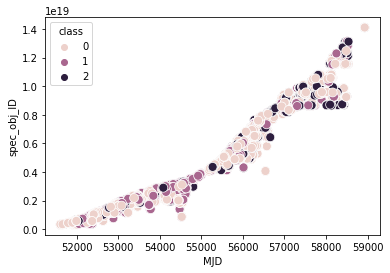

In [ ]:
sns.scatterplot(x='MJD',y ='spec_obj_ID',hue = 'class',data = df,s=80)

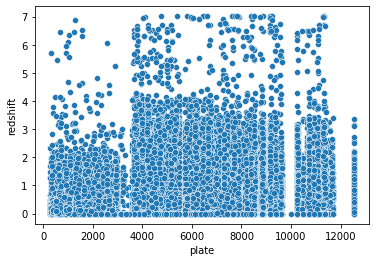

In [ ]:
sns.scatterplot(x = df.plate,y=df.redshift)

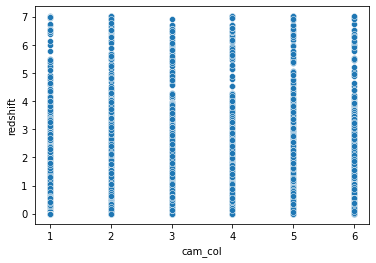

In [ ]:
sns.scatterplot(x = df.cam_col,y=df.redshift)

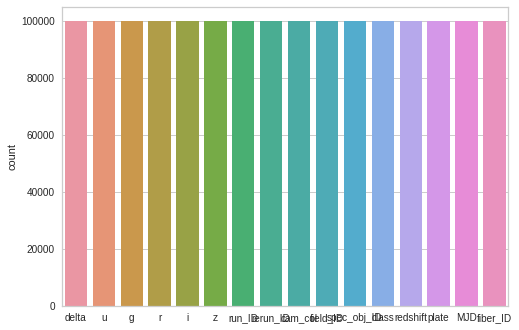

In [ ]:
sns.countplot(data=df)

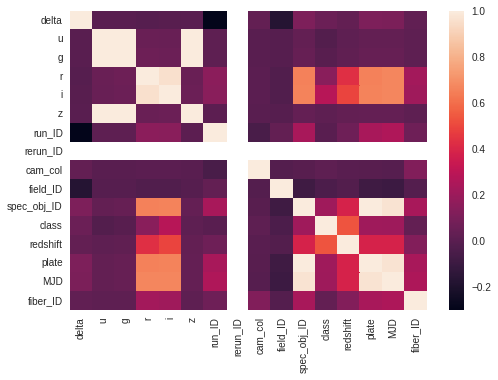

In [ ]:
# Generates heatmap for data correlation matrix
sns.heatmap(df.corr())

In [ ]:
# pairplot
sns.pairplot(data=df)

In [ ]:
sns.pairplot(df,hue='class')

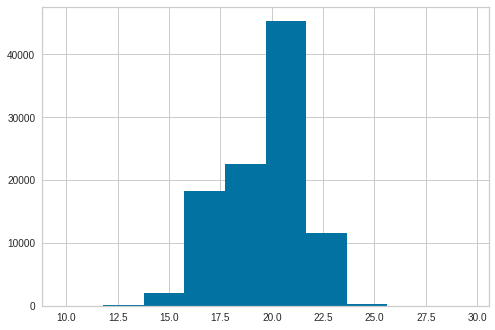

In [ ]:
df.r.hist()

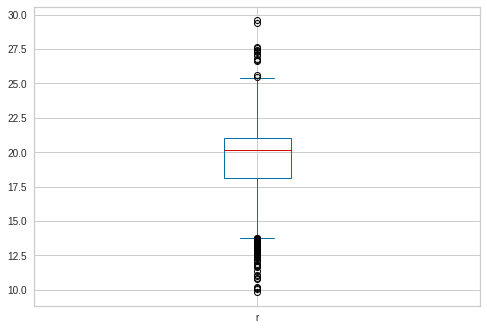

In [ ]:
df.r.plot.box()

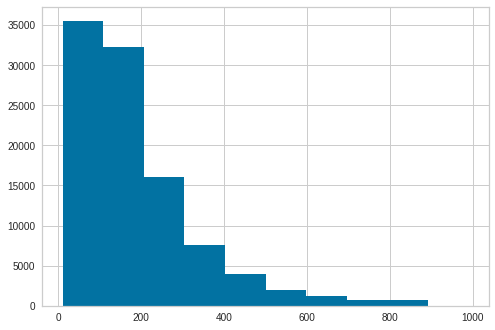

In [ ]:
df.field_ID.hist()

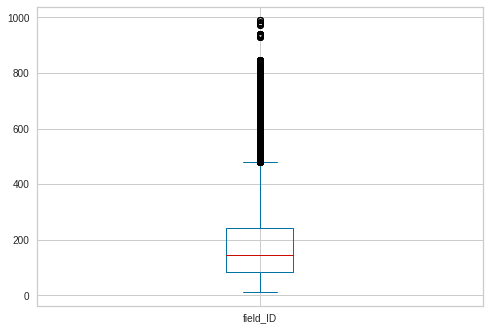

In [ ]:
df.field_ID.plot.box()

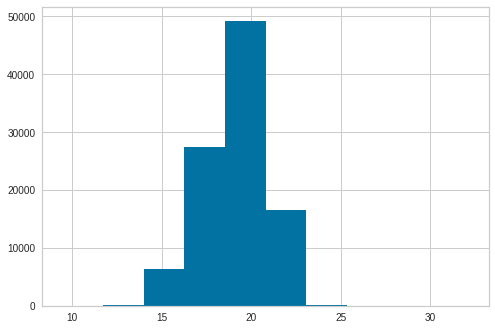

In [ ]:
df.i.hist()

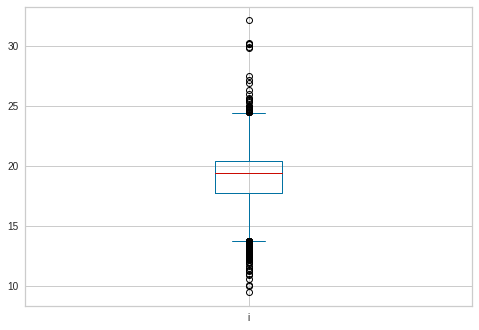

In [ ]:
df.i.plot.box()

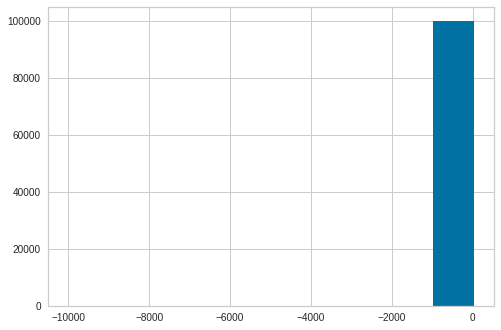

In [ ]:
df.z.hist()

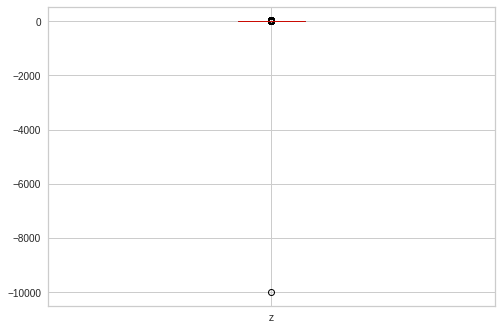

In [ ]:
df.z.plot.box()

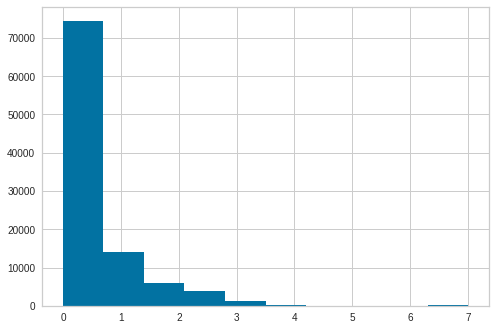

In [ ]:
df.redshift.hist()

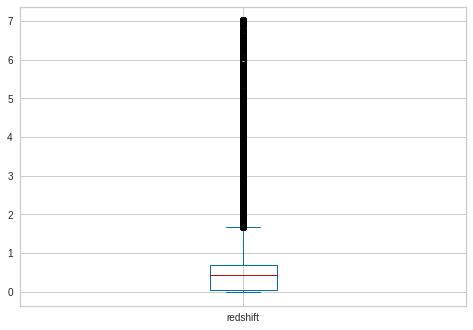

In [ ]:
df.redshift.plot.box()

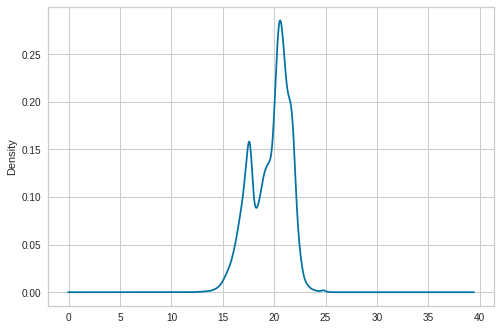

In [ ]:
df.r.plot.density()

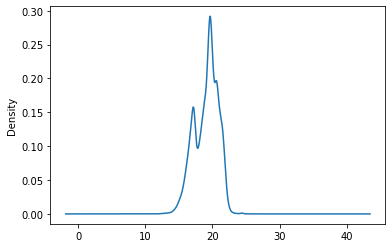

In [ ]:
df.i.plot.density()

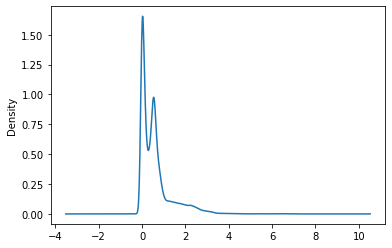

In [ ]:
df.redshift.plot.density()

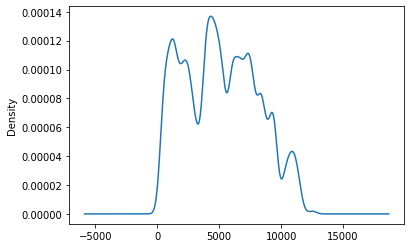

In [ ]:
df.plate.plot.density()

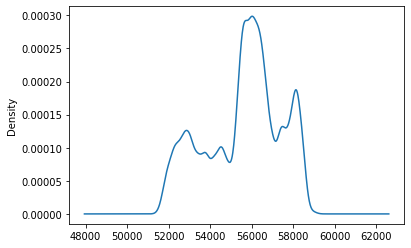

In [ ]:
df.MJD.plot.density()

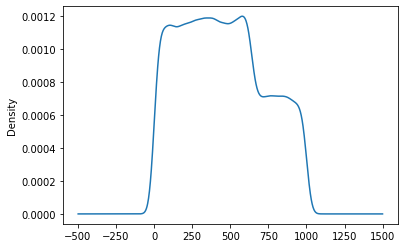

In [ ]:
df.fiber_ID.plot.density()

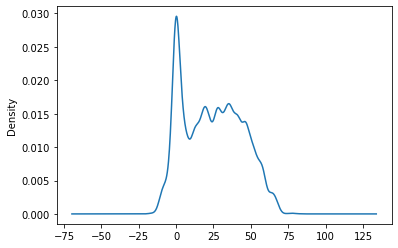

In [ ]:
df.delta.plot.density()

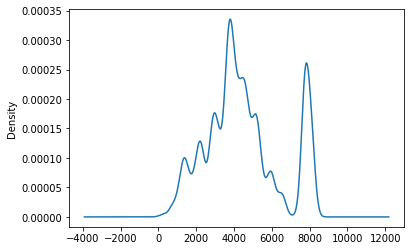

In [ ]:
df.run_ID.plot.density()

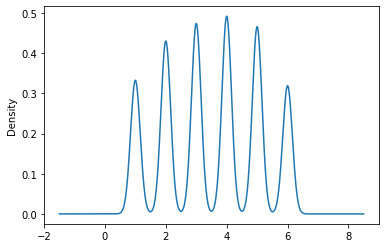

In [ ]:
df.cam_col.plot.density()

In [ ]:
# numeric_list = ["obj_ID", "alpha","delta","u","g","r","i","z","run_ID","rerun_ID","cam_col","field_ID","spec_obj_ID","redshift","plate","MJD","fiber_ID"]
# # df_numeric = df.loc[:, numeric_list]
# df_numeric.head()

OUTLIERS DETECTION


In [ ]:
# outlier detection
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df)

In [ ]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold = np.quantile(x_score , .10)                                            
filtr = outlier_score["score"] < threshold
outlier_index = outlier_score[filtr].index.tolist()

In [ ]:
threshold


-2.3191353694570194

In [ ]:
len(outlier_index)

10000

In [ ]:
df.drop(outlier_index, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   delta        90000 non-null  float64
 1   u            90000 non-null  float64
 2   g            90000 non-null  float64
 3   r            90000 non-null  float64
 4   i            90000 non-null  float64
 5   z            90000 non-null  float64
 6   run_ID       90000 non-null  int64  
 7   rerun_ID     90000 non-null  int64  
 8   cam_col      90000 non-null  int64  
 9   field_ID     90000 non-null  int64  
 10  spec_obj_ID  90000 non-null  float64
 11  class        90000 non-null  int64  
 12  redshift     90000 non-null  float64
 13  plate        90000 non-null  int64  
 14  MJD          90000 non-null  int64  
 15  fiber_ID     90000 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 11.7 MB


In [ ]:
numerical_list = ["delta","u","g","r","i","z","run_ID","cam_col","field_ID","spec_obj_ID","class","redshift","plate","MJD","fiber_ID"]

In [ ]:
df_numeric = df.loc[:, numerical_list]
sns.pairplot(df_numeric, diag_kind = "kde")
plt.show()

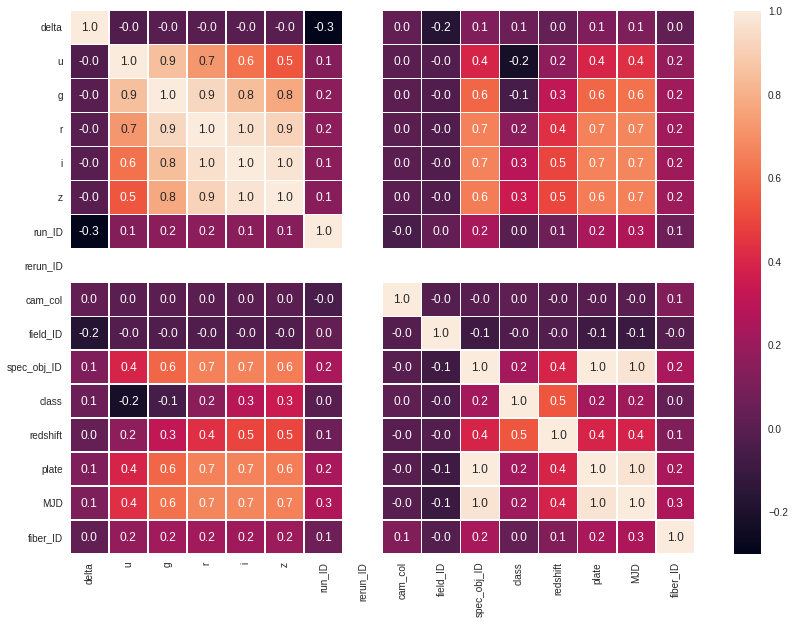

In [ ]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

In [ ]:
corr = df.corr()

In [ ]:
corr["class"].sort_values()

u             -0.225714
g             -0.061782
field_ID      -0.037218
run_ID         0.000413
cam_col        0.016416
fiber_ID       0.035790
delta          0.058382
r              0.157767
MJD            0.212281
spec_obj_ID    0.222530
plate          0.222530
i              0.291800
z              0.347889
redshift       0.541136
class          1.000000
rerun_ID            NaN
Name: class, dtype: float64

In [ ]:
df = df.drop(['delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)

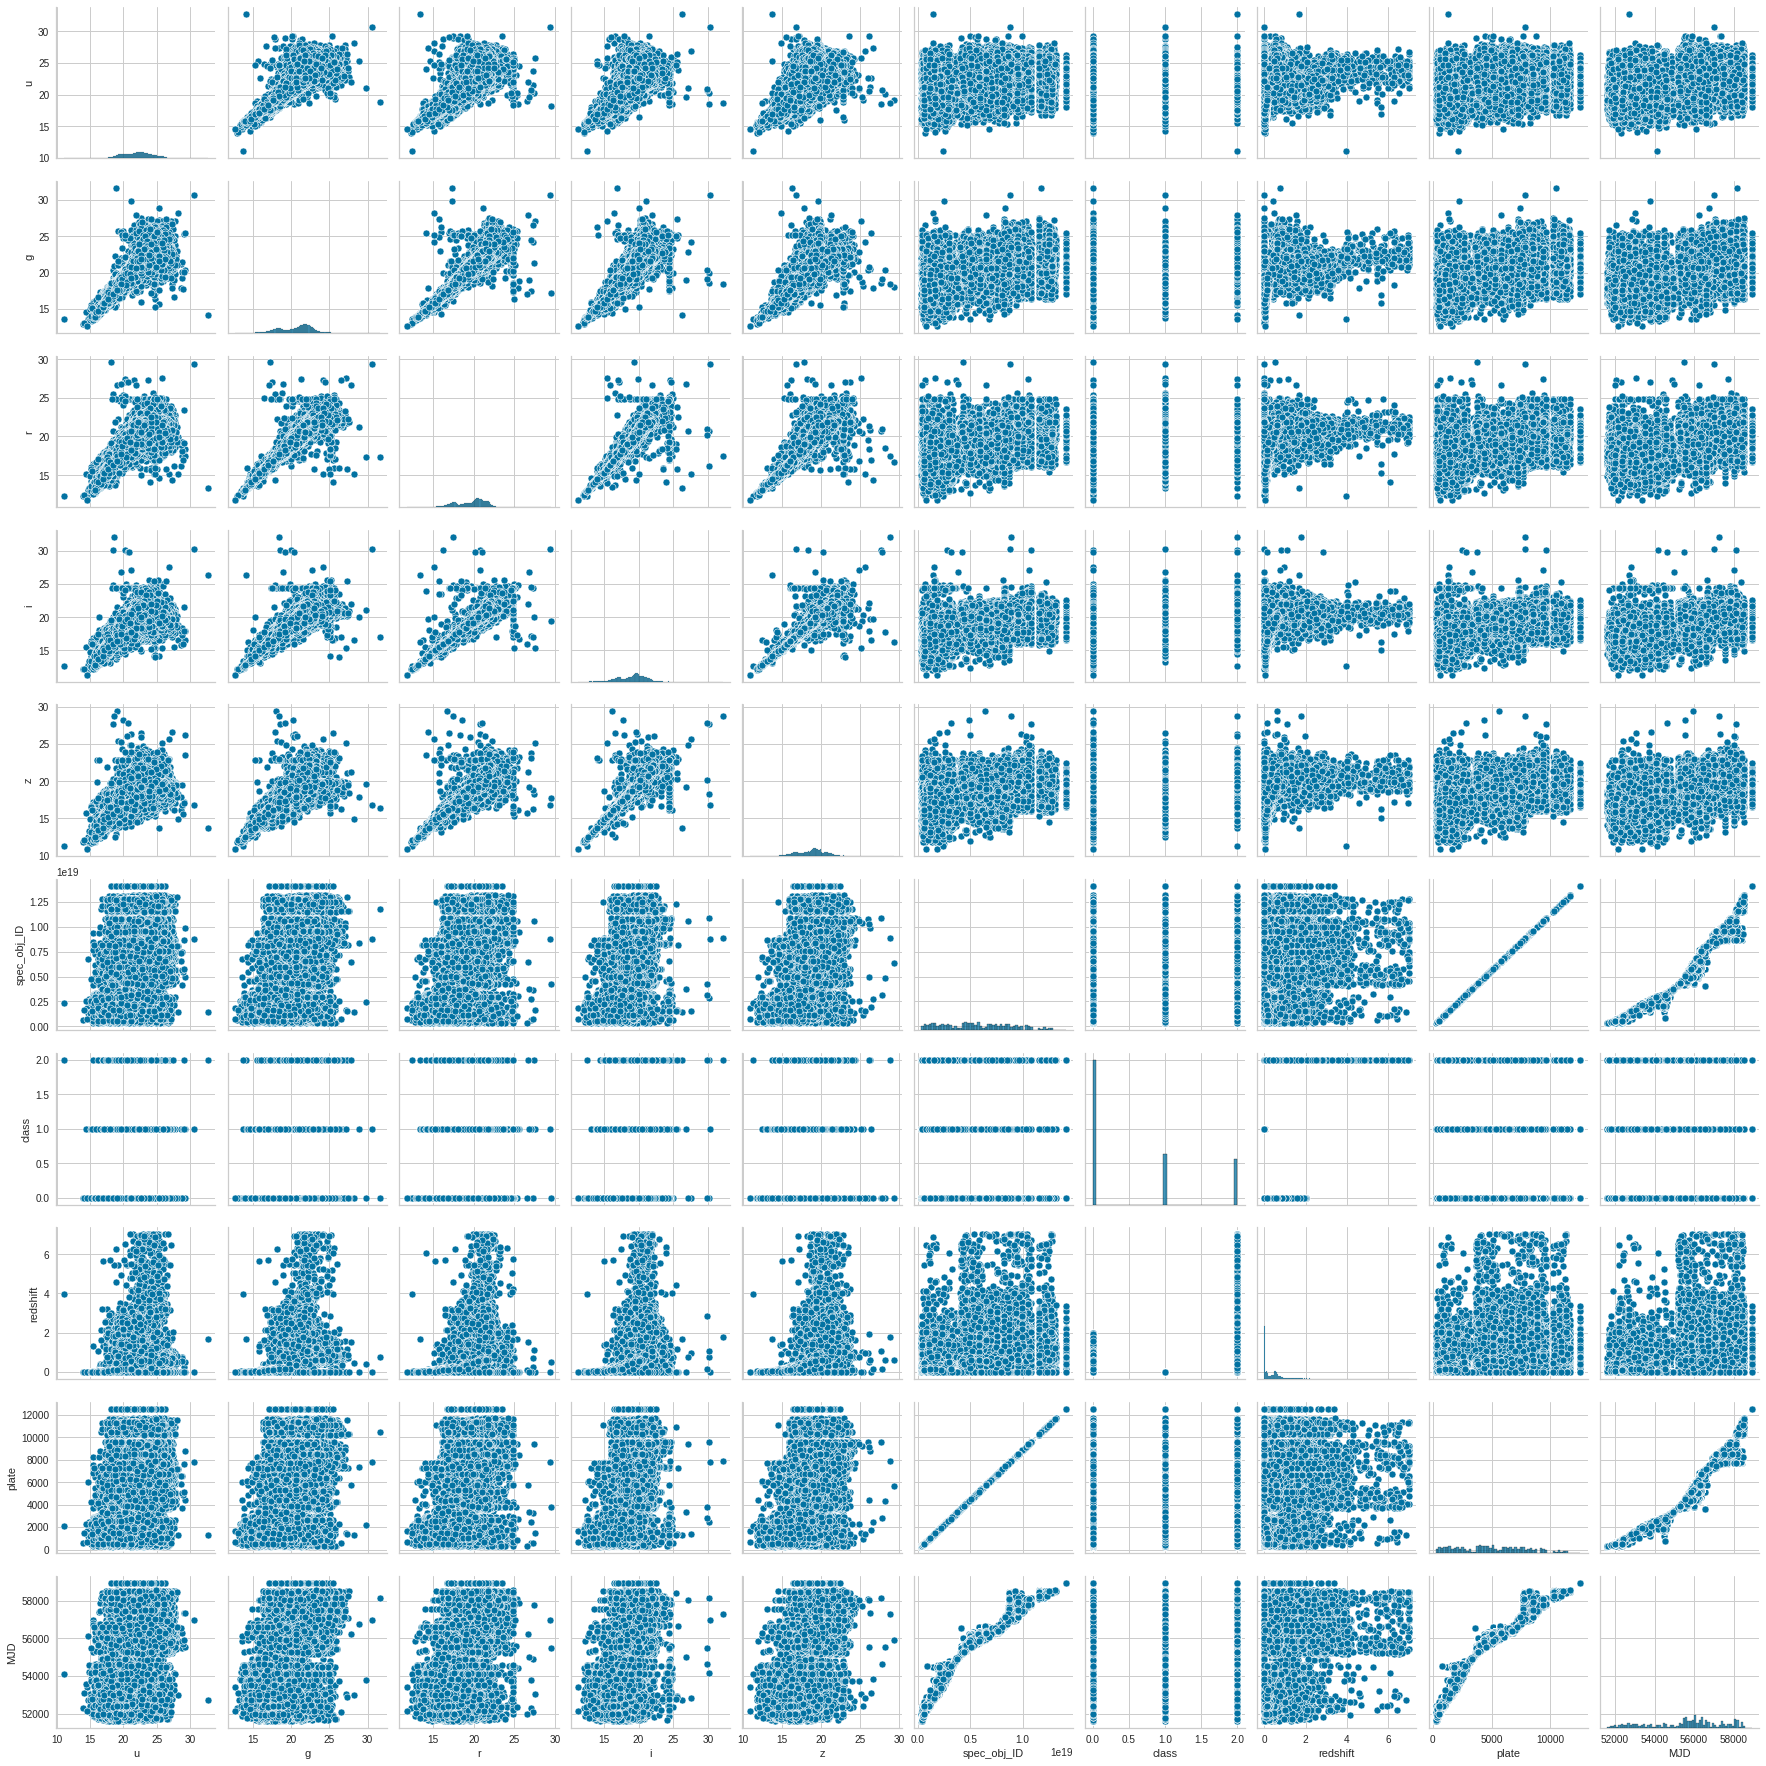

In [ ]:
sns.pairplot(data=df)

In [ ]:
x = df.drop(["class"], axis = 1)
y = df.loc[:,"class"].values

data imbalancing


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
x, y = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 53812, 1: 18999, 2: 17189})
Resampled dataset shape Counter({0: 53812, 2: 53812, 1: 53812})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


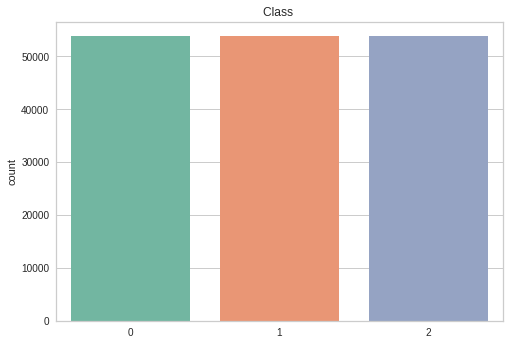

In [ ]:
sns.countplot(y, palette='Set2')
plt.title("Class ",fontsize=12)
plt.show()

In [ ]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
y=pd.DataFrame(y,columns=["class"])

In [ ]:
pca = PCA(0.95)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
            , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

In [ ]:
finalDf = pd.concat([principalDf, y[['class']]], axis = 1)

In [ ]:
finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,class
0,-0.870686,-0.617430,-0.738834,-0.710390,0
1,-4.011646,0.112387,-0.918934,0.071098,0
2,-0.822840,-1.589210,-0.724573,-0.935421,0
3,-2.718768,0.530378,-0.656320,-0.211055,0
4,2.897949,2.368981,-0.930490,-0.792824,0
...,...,...,...,...,...
161431,-1.880182,0.649517,1.075257,-0.149181,2
161432,-1.149242,0.235134,1.778343,-0.210964,2
161433,2.960233,-1.096004,1.050110,0.694247,2
161434,-1.921649,1.124134,0.990155,0.082139,2


In [ ]:
pca.explained_variance_ratio_

array([0.67500743, 0.1602524 , 0.10105421, 0.04554191])

The explained variance tells you how much information (variance) can be attributed to each of the principal components.By using the attribute explained_varianceratio, it can be seen that the first principal component contains 67.56% of the variance,the second principal component contains 15.96% of the variance,third principal component contains 10.10% of the variance and fourth principal component contains 4.56% of the variance . Together, the four components contain 98.18% of the information.


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(principalDf, y, test_size = 0.33, random_state = 42)

In [ ]:
print("x_train: {}".format(x_train.shape))
print("x_test: {}".format(x_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

x_train: (108162, 4)
x_test: (53274, 4)
y_train: (108162, 1)
y_test: (53274, 1)


SVM model


In [ ]:
svm_clf = svm.SVC(kernel='rbf', C=10, random_state=42)
svm_clf.fit(x_train,y_train)
predicted = svm_clf.predict(x_test)
score = svm_clf.score(x_test, y_test)
svm_score_ = np.mean(score)

print('Accuracy : %.3f' % (svm_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy : 0.971


In [ ]:
classes = ['GALAXY','STAR','QSO']

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


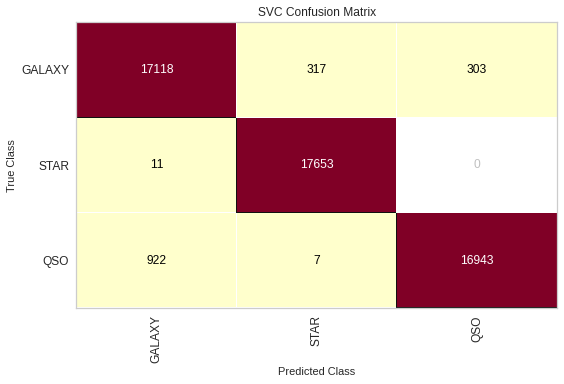

In [ ]:
svm_cm = ConfusionMatrix(svm_clf, classes=classes, cmap='YlOrRd')
svm_cm.fit(x_train, y_train)
svm_cm.score(x_test, y_test)
svm_cm.show()

In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     17738
           1       0.98      1.00      0.99     17664
           2       0.98      0.95      0.96     17872

    accuracy                           0.97     53274
   macro avg       0.97      0.97      0.97     53274
weighted avg       0.97      0.97      0.97     53274



In [ ]:
RFC = RandomForestClassifier(random_state=42)
RFC.fit(x_train,y_train)
y_predicted = RFC.predict(x_test)
score = RFC.score(x_test, y_test)
rf_score_ = np.mean(score)
print('Accuracy : %.3f' % (rf_score_))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy : 0.959


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


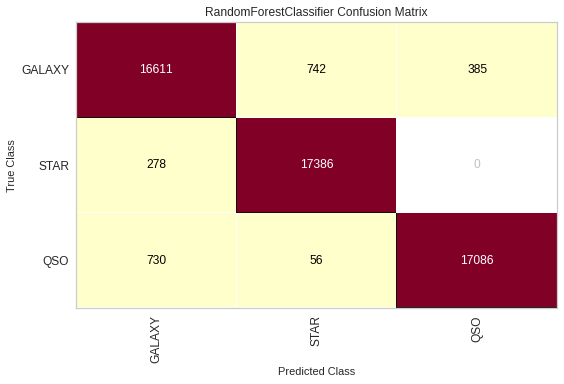

In [ ]:
RFC_cm = ConfusionMatrix(RFC, classes=classes, cmap='YlOrRd')
RFC_cm.fit(x_train, y_train)
RFC_cm.score(x_test, y_test)
RFC_cm.show()

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     17738
           1       0.96      0.98      0.97     17664
           2       0.98      0.96      0.97     17872

    accuracy                           0.96     53274
   macro avg       0.96      0.96      0.96     53274
weighted avg       0.96      0.96      0.96     53274



In [ ]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train,y_train)
y_predicted_KNN = KNN.predict(x_test)
score = KNN.score(x_test, y_test)
KNN_score_ = np.mean(score)
print('Accuracy : %.3f' % (KNN_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy : 0.954


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


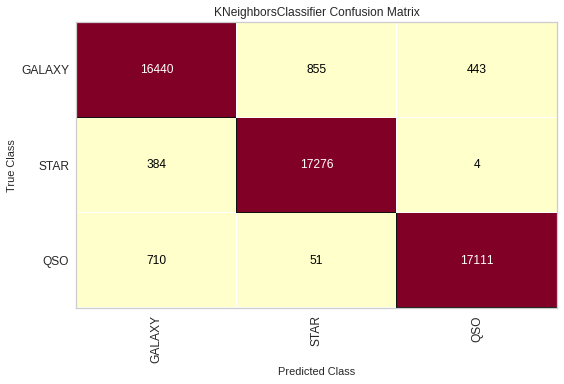

In [ ]:
KNN_cm = ConfusionMatrix(KNN, classes=classes, cmap='YlOrRd')
KNN_cm.fit(x_train, y_train)
KNN_cm.score(x_test, y_test)
KNN_cm.show()